<a href="https://colab.research.google.com/github/pramodgangula19/5731_Spring24/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
# Write your code here

# Install necessary libraries
!pip install gensim
!pip install nltk

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
df = pd.read_csv('dataset.csv')

# Function for tokenization and preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Identify the text column automatically
text_column = df.select_dtypes(include=['object']).columns[0]  # Assumes the text data is in the first object column
df['tokens'] = df[text_column].apply(preprocess)

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(df['tokens'])

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the top 10 topics
for topic_id, words in lda_model.print_topics(num_topics=10):
    print(f"Topic {topic_id + 1}: {words}")

# Assign topics to each document
df['topic'] = df['tokens'].apply(lambda x: max(lda_model[dictionary.doc2bow(x)], key=lambda y: y[1])[0])

# Display the top 10 clusters and their descriptions
top_clusters = df['topic'].value_counts().head(10)
for cluster_id, count in top_clusters.items():
    print(f"\nCluster {cluster_id + 1} - Count: {count}")
    print(df[df['topic'] == cluster_id][text_column].head())





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 1: 0.023*"story" + 0.017*"like" + 0.017*"boy" + 0.017*"world" + 0.017*"film" + 0.017*"could" + 0.017*"happened" + 0.011*"rescue" + 0.011*"thing" + 0.011*"even"
Topic 2: 0.025*"documentary" + 0.025*"life" + 0.020*"people" + 0.015*"rescue" + 0.015*"cave" + 0.015*"moment" + 0.015*"several" + 0.010*"real" + 0.010*"thing" + 0.010*"come"
Topic 3: 0.051*"rescue" + 0.034*"cave" + 0.034*"thai" + 0.017*"story" + 0.017*"time" + 0.017*"watch" + 0.017*"happened" + 0.017*"made" + 0.017*"big" + 0.017*"incredible"
Topic 4: 0.032*"documentary" + 0.024*"story" + 0.020*"film" + 0.020*"human" + 0.016*"rescue" + 0.016*"one" + 0.016*"footage" + 0.012*"best" + 0.012*"tell" + 0.008*"watch"
Topic 5: 0.027*"cave" + 0.021*"rescue" + 0.018*"diver" + 0.018*"one" + 0.015*"boy" + 0.012*"thai" + 0.012*"became" + 0.012*"two" + 0.009*"documentary" + 0.009*"dangerous"
Topic 6: 0.032*"documentary" + 0.021*"rescue" + 0.021*"best" + 0.021*"british" + 0.021*"kleenex" + 0.021*"courage" + 0.011*"cave" + 0.011*"story" + 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [3]:
# Write your code here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv('Sentiment_Dataset.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Use TF-IDF vectorizer for feature extraction
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size
X_train = vectorizer.fit_transform(train_data['Review'])
X_test = vectorizer.transform(test_data['Review'])
y_train = train_data['Sentiment']
y_test = test_data['Sentiment']
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Model 1: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Model 2: Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
# Perform Cross-Validation
cv_scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5)
cv_scores_rf = cross_val_score(random_forest, X_train, y_train, cv=5)

print("Cross-Validation Scores:")
print(f"Logistic Regression: {cv_scores_log_reg.mean():.4f}")
print(f"Random Forest: {cv_scores_rf.mean():.4f}")



Performance Metrics for Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Performance Metrics for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Cross-Validation Scores:
Logistic Regression: 1.0000
Random Forest: 1.0000


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

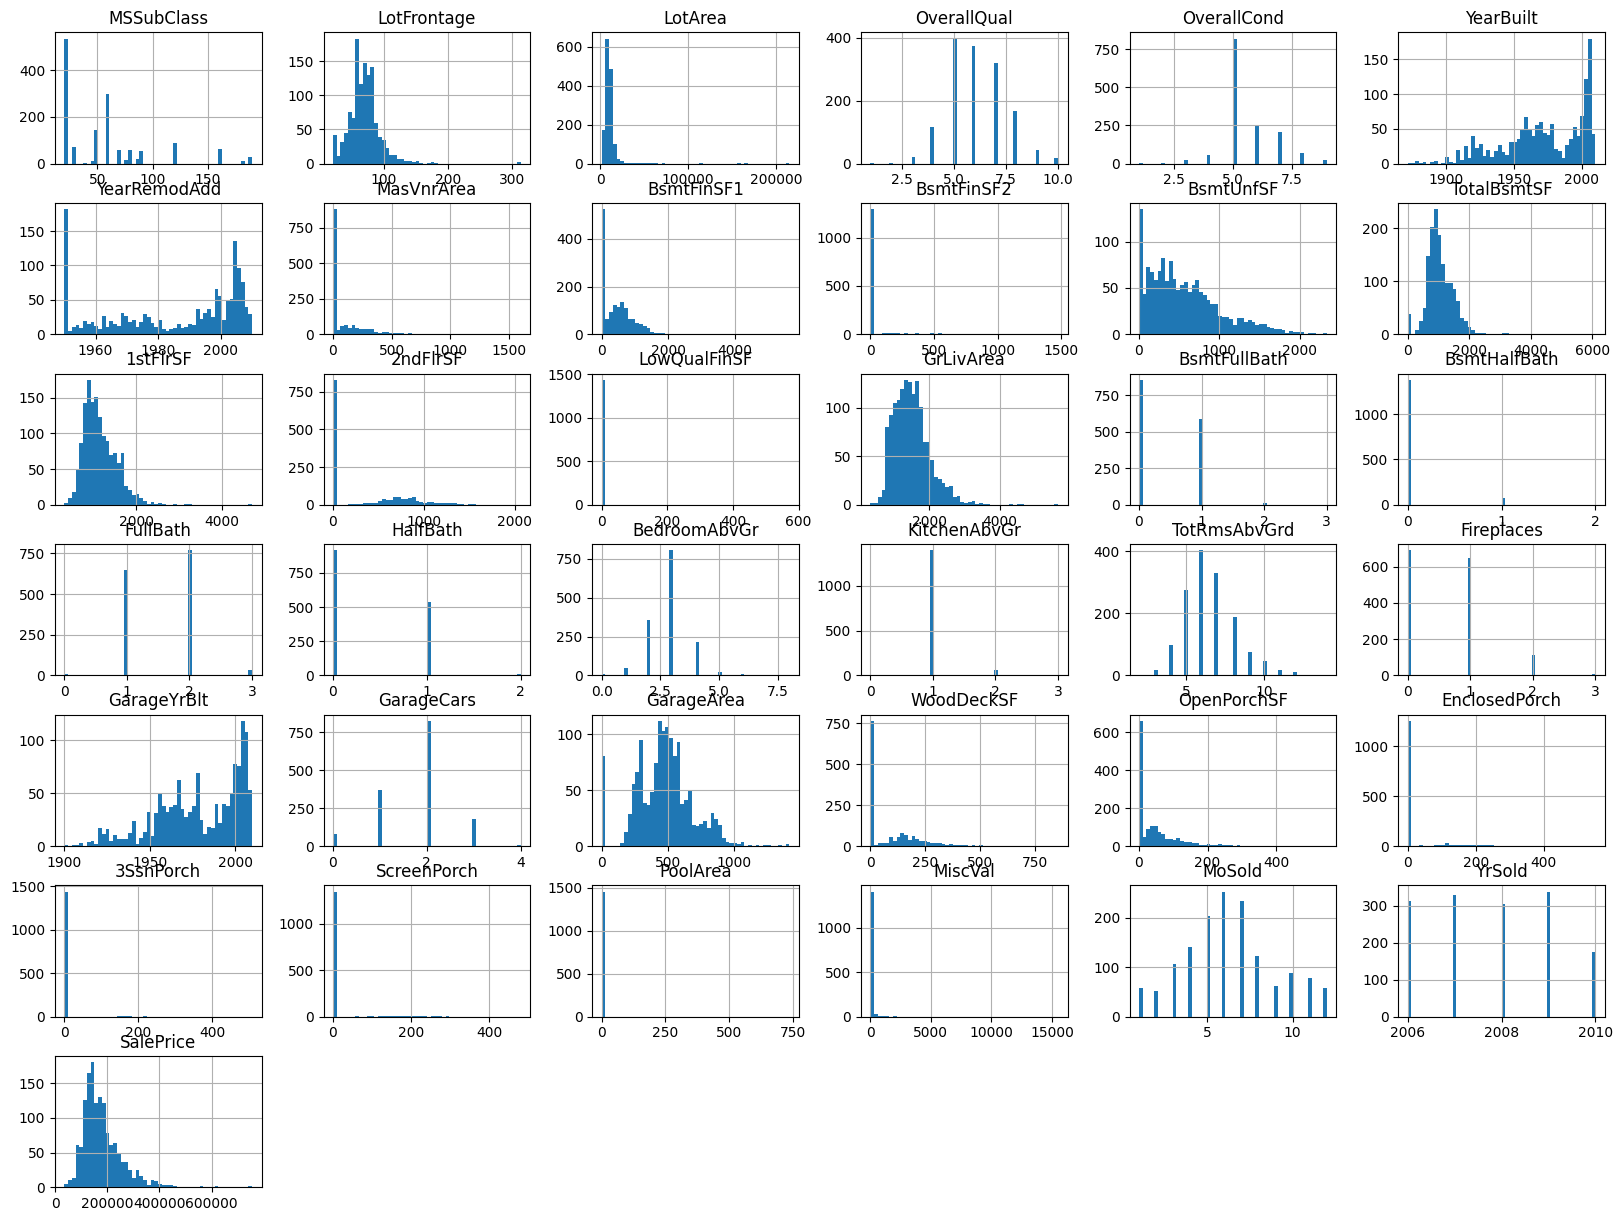

Linear Regression R squared: 0.7043


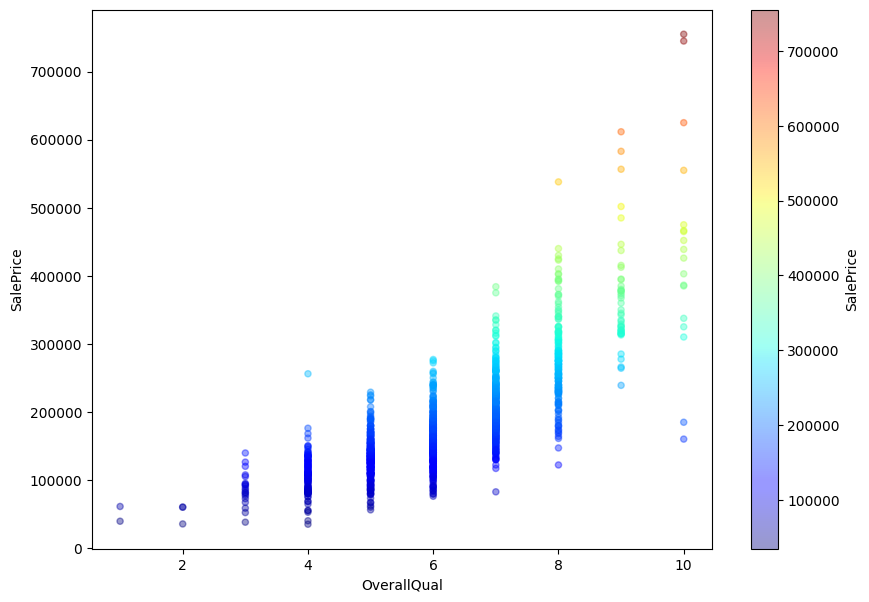

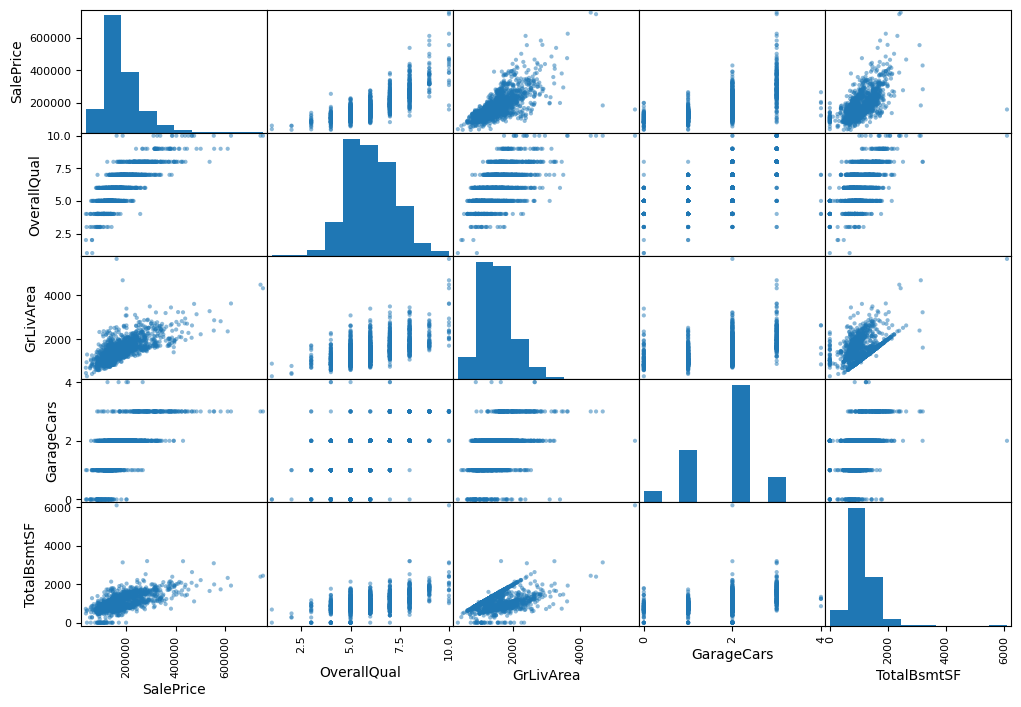

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load the data
sf = pd.read_csv('train.csv')

# Drop unnecessary columns
sf.drop(columns=['Id', 'Street', 'Alley', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature'], inplace=True)

# Display information about the DataFrame
sf.info()

# Display descriptive statistics
sf.describe()

# Plot attribute histograms
%matplotlib inline
sf.hist(bins=50, figsize=(20, 15))
plt.savefig("attribute_histogram_plots")
plt.show()

# Plot scatter plot using different columns
sf.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.4, figsize=(10, 7),
        c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True,
        sharex=False)



# Plot scatter matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

# Prepare data for linear regression
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
target = 'SalePrice'

X = sf[features]
Y = sf[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [9]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Assuming you've already got your `texts` from somewhere in your code
texts = ["I love this product!", "This is the worst experience ever.", "I feel indifferent about this."]
ground_truth = ['positive', 'negative', 'neutral']  # Example ground truth labels

# Load the zero-shot classification pipeline with BERT
classifier = pipeline("zero-shot-classification", model="bert-base-uncased")
results = [classifier(text, candidate_labels=["positive", "negative", "neutral"], hypothesis_template="This text is {}.") for text in texts]

# Extract predictions
predictions = [result['labels'][0] for result in results]  # Taking the top prediction for each text

# Calculate metrics
accuracy = accuracy_score(ground_truth, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 0.6666666666666666
F1 Score: 0.5555555555555555


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Write your code here


